### Import Libraries

In [91]:
# Install necessary libraries
!pip install pandas numpy scikit-learn matplotlib seaborn sklearn.preprocessing

In [170]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import seaborn as sns

### Explore Data

In [171]:
train_dataset_df = pd.read_csv('train.csv')
train_Y = train_dataset_df['Survived']
train_X = train_dataset_df.drop('Survived', axis=1)

test_X = pd.read_csv('test.csv')

In [172]:
train_X.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [173]:
train_X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


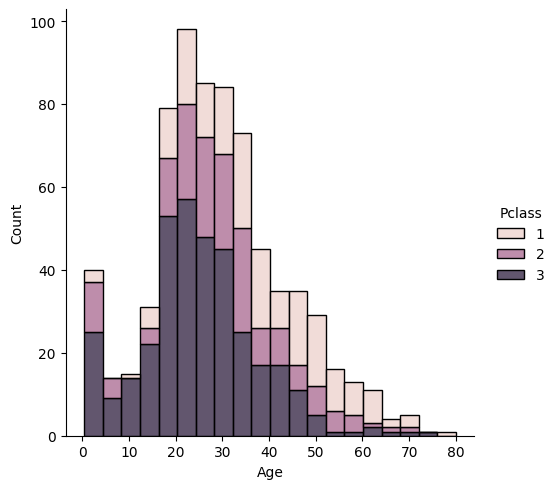

In [174]:
sns.displot(data=train_X, x='Age', hue='Pclass', multiple='stack')

In [175]:
train_X.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: xlabel='Sex', ylabel='count'>

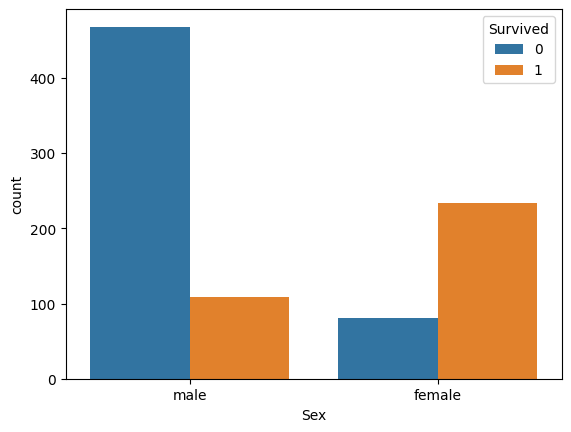

In [176]:
sns.countplot(x='Sex', hue='Survived', data=train_dataset_df)

<Axes: xlabel='Age', ylabel='Fare'>

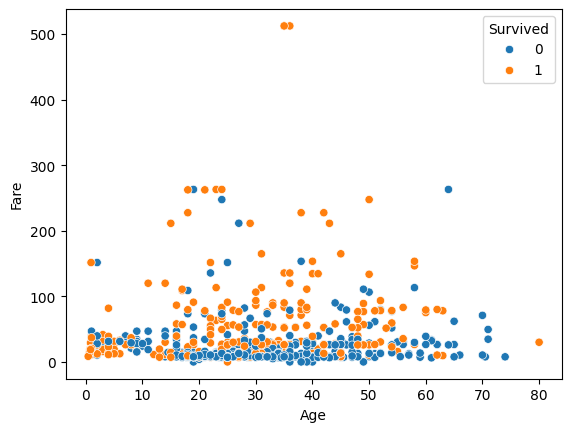

In [177]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_dataset_df)

In [178]:
train_dataset_df[['SibSp', 'Survived','Parch']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived')

,SibSp,Survived,Parch
5,5,0.000000,2.000000
6,8,0.000000,2.000000
4,4,0.166667,1.500000
3,3,0.250000,1.312500
0,0,0.345395,0.185855
2,2,0.464286,0.642857
1,1,0.535885,0.655502


### Clean and Preprocess Data

In [179]:
train_X = train_X.drop('Cabin', axis=1)
test_X = test_X.drop('Cabin', axis=1)

In [180]:
train_X['Sex'] = train_X['Sex'].map({'female': 1, 'male': 0}).astype(int)
test_X['Sex'] = test_X['Sex'].map({'female': 1, 'male': 0}).astype(int)

In [181]:
train_X = train_X.drop('Name', axis=1)

In [182]:
test_X = test_X.drop('Name', axis=1)

In [183]:
test_X = test_X.drop('Ticket', axis=1)

In [184]:
train_X = train_X.drop('Ticket', axis=1)

In [185]:
train_X = train_X.drop('Embarked', axis=1)
test_X = test_X.drop('Embarked', axis=1)

In [186]:
freq_port = train_X['Age'].dropna().mode()[0]
train_X['Age'] = train_X['Age'].fillna(freq_port)
test_X['Age'] = test_X['Age'].fillna(freq_port)

In [201]:
test_X['Fare'].fillna(test_X['Fare'].dropna().median(), inplace=True)

/var/folders/6r/1tc8r8nj3dqg8n_prswrmlpm0000gn/T/ipykernel_18210/2524045444.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_X['Fare'].fillna(test_X['Fare'].dropna().median(), inplace=True)


### Feature Engineering

In [187]:
# LOL leave empty for now

### Split Data

### Build Models

In [188]:
train_X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,0,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,3,1,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,3,0,35.0,0,0,8.0500


In [189]:
model = LogisticRegression(max_iter=10000)
model.fit(train_X, train_Y)

LogisticRegression(max_iter=10000)

### Evaludate Models

In [202]:
train_X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,0,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,3,1,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,2,0,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,3,1,24.0,1,2,23.4500
889,890,1,0,26.0,0,0,30.0000


In [203]:
test_X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,0,34.5,0,0,7.8292
1,893,3,1,47.0,1,0,7.0000
2,894,2,0,62.0,0,0,9.6875
3,895,3,0,27.0,0,0,8.6625
4,896,3,1,22.0,1,1,12.2875
...,...,...,...,...,...,...,...
413,1305,3,0,24.0,0,0,8.0500
414,1306,1,1,39.0,0,0,108.9000
415,1307,3,0,38.5,0,0,7.2500
416,1308,3,0,24.0,0,0,8.0500


In [204]:
from sklearn.metrics import accuracy_score, classification_report

In [205]:
# Predictions
y_pred = model.predict(train_X)

# Evaluate model
accuracy = accuracy_score(train_Y, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7934904601571269


In [206]:
test_Y = model.predict(test_X)

In [210]:
submission = pd.DataFrame({
    "PassengerId": test_X["PassengerId"],
    "Survived": test_Y
})

In [213]:
submission.to_csv("testY.csv", index=False)